In [1]:
import sys
sys.path.append('euthyroid_sick_syndrome')
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from utils import *

2023-05-19 23:56:53.457946: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-19 23:56:56.075340: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-19 23:56:56.077127: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-19 23:57:03.029724: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [10]:
#carregando o dataset e utilizando as 8 features retornadas pelo RFE

dataset = pd.read_csv('../euthyroid_sick_syndrome/datasets/euthyroid/euthyroid_final_features.csv')

In [11]:
output_label_dataset = dataset['classification']  #1 = sick, 0 = normal
dataset = dataset[['age', 'on_thyroxine', 'query_hypothyroid', 'TSH', 'T3', 'TT4', 'T4U','FTI']]

In [12]:
dataset.head()

,age,on_thyroxine,query_hypothyroid,TSH,T3,TT4,T4U,FTI
0,45,0,0,1.90,1.0,82.0,0.73,112.0
1,64,0,0,0.09,1.0,101.0,0.82,123.0
2,56,0,0,0.00,0.8,76.0,0.77,99.0
3,78,1,1,2.60,0.3,87.0,0.95,91.0
4,80,0,0,1.40,0.8,105.0,0.88,120.0


In [13]:
#fazendo o balanceamento dos dados
dataset_res, ouput_label = balance_dataset_smote(dataset, output_label_dataset, random_state=42, k_neighbors=5)


In [28]:
 # Dividindo os dados em treino e teste em 80% e 20% respectivamente
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3, stratify=y)
input_train, input_test, output_train, output_test = slipt_and_standardize_dataset(dataset=dataset_res, output_label=ouput_label, test_size=0.1)

In [29]:
input_train = np.asarray( input_train)
input_test = np.asarray( input_test)
output_train =np.asarray( output_train)
output_test =np.asarray( output_test)

In [30]:

# Modelo de rede perceptron multicamadas com uma camada oculta de 64 neurônios
# e camada de saída com 1 neurônios (1 classes)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64, input_dim=8, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary() #visualizando o modelo



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                576       
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [31]:


# Compile model
# Otimizador Adam com taxa de aprendizado de 0.01
opt = tf.keras.optimizers.Adam()
# Função de custo categorical_crossentropy (para problemas de classificação com mais de duas classes)
# Métrica de avaliação MSE (Mean Squared Error)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['mse'])

# Train model
history = model.fit(input_train, output_train, validation_split=0.2, epochs=50)


Epoch 1/50
130/130 [==============================] - 1s 3ms/step - loss: 0.5666 - mse: 0.1899 - val_loss: 0.4689 - val_mse: 0.1466
Epoch 2/50
130/130 [==============================] - 0s 2ms/step - loss: 0.4185 - mse: 0.1278 - val_loss: 0.3767 - val_mse: 0.1132
Epoch 3/50
130/130 [==============================] - 0s 2ms/step - loss: 0.3564 - mse: 0.1063 - val_loss: 0.3315 - val_mse: 0.0984
Epoch 4/50
130/130 [==============================] - 0s 2ms/step - loss: 0.3203 - mse: 0.0940 - val_loss: 0.3034 - val_mse: 0.0889
Epoch 5/50
130/130 [==============================] - 0s 2ms/step - loss: 0.2946 - mse: 0.0853 - val_loss: 0.2832 - val_mse: 0.0818
Epoch 6/50
130/130 [==============================] - 0s 2ms/step - loss: 0.2744 - mse: 0.0786 - val_loss: 0.2702 - val_mse: 0.0769
Epoch 7/50
130/130 [==============================] - 0s 2ms/step - loss: 0.2607 - mse: 0.0739 - val_loss: 0.2612 - val_mse: 0.0742
Epoch 8/50
130/130 [==============================] - 0s 1ms/step - loss: 0.

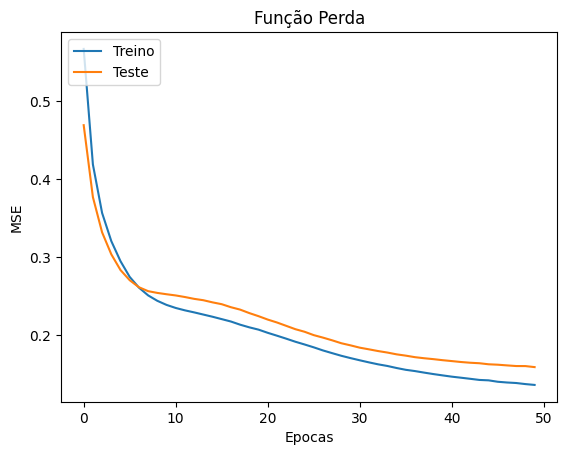

In [32]:

# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Função Perda')
plt.ylabel('MSE')
plt.xlabel('Epocas')
plt.legend(['Treino', 'Teste'], loc='upper left')
plt.show()



In [ ]:

#padronizando os dados de teste
sc = StandardScaler()
sc.fit(input_train)


# esse teste é de um paciente doente (1)
teste = [[45, 0, 0, 1.9, 1.0,	82.0,	0.73,	112.0]]
teste = sc.transform(teste)
# Predict
"""
    1 - Sick
    0 - Normal
"""
y_predd = model.predict(teste)
y_predd = np.argmax(y_predd, axis=1)+1 
print("A classe é:",  y_predd[-1])